<a href="https://colab.research.google.com/github/2203A51819/Data_Analysis_Using_Python_3-1/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Simulate a dataset of 2000 patient blood pressure readings, analyze its distribution, demonstrate the Central Limit Theorem by sampling and plotting the distribution of sample means for different sample sizes, calculate and compare summary statistics, and show how standard error decreases with increasing sample size.

## Data preparation & loading

### Subtask:
Generate a list of 2,000 simulated patient blood pressure readings and convert it into a Pandas DataFrame.


**Reasoning**:
Generate a list of 2000 simulated patient blood pressure readings using numpy and convert it into a pandas DataFrame.



In [1]:
import numpy as np
import pandas as pd

blood_pressure_readings = np.random.normal(loc=120, scale=15, size=2000)
df_blood_pressure = pd.DataFrame(blood_pressure_readings, columns=['blood_pressure'])

## Data exploration & visualization

### Subtask:
Plot a histogram of the full dataset to visualize the blood pressure distribution.


**Reasoning**:
Plot a histogram of the 'blood_pressure' column to visualize its distribution, including labels and a title for clarity.



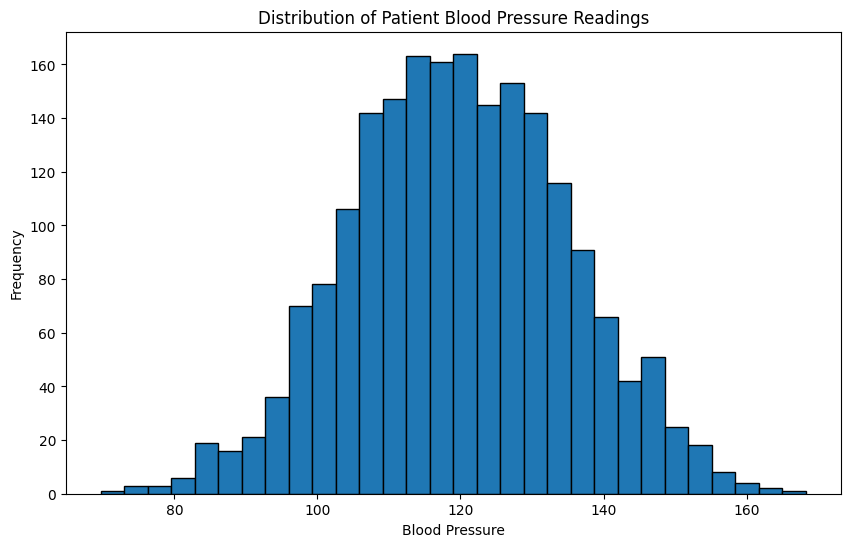

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_blood_pressure['blood_pressure'], bins=30, edgecolor='black')
plt.title("Distribution of Patient Blood Pressure Readings")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.show()

## Sampling and clt demonstration

### Subtask:
Take multiple random samples of different sizes, compute their means, and plot histograms of the sample means for each size to demonstrate the Central Limit Theorem.


**Reasoning**:
The subtask requires taking multiple random samples of different sizes, computing their means, and plotting histograms of the sample means for each size. This involves iterating through different sample sizes, repeatedly sampling and calculating means, storing these means, and then generating histograms for each set of sample means. All these steps can be combined into a single code block for efficiency.



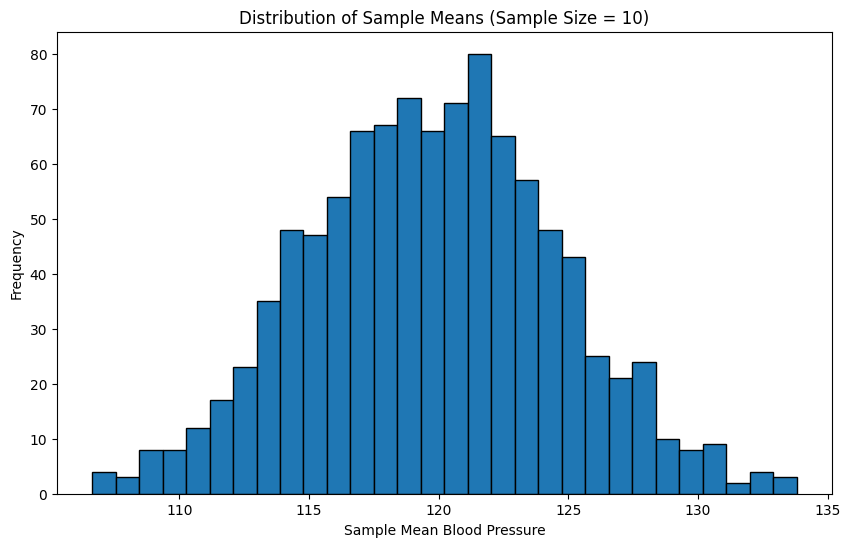

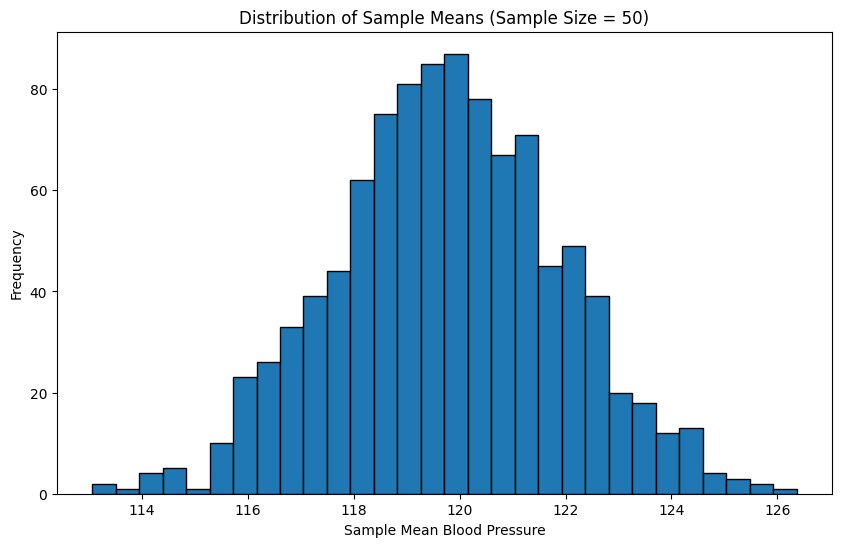

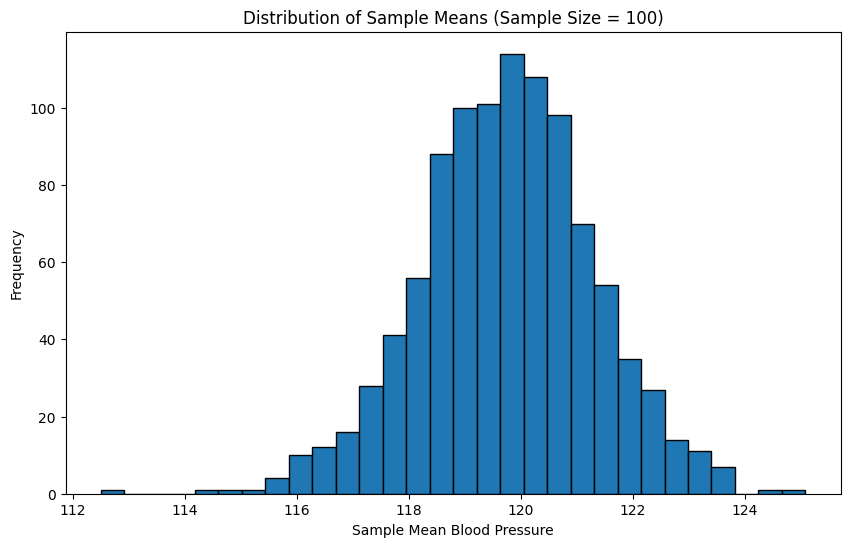

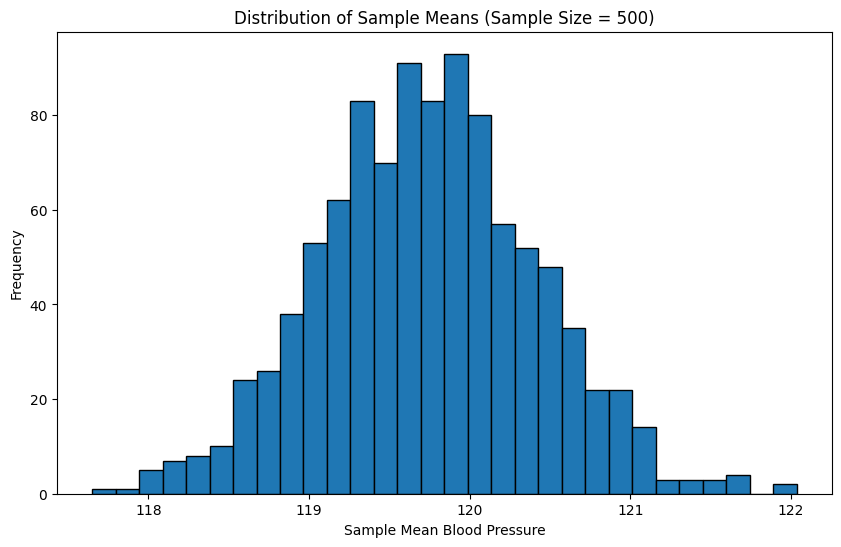

In [3]:
sample_sizes = [10, 50, 100, 500]
sample_means = {}

for size in sample_sizes:
    means_list = []
    for _ in range(1000): # Repeat sampling 1000 times
        sample = df_blood_pressure['blood_pressure'].sample(size, replace=True) # Sample with replacement
        means_list.append(sample.mean())
    sample_means[size] = means_list

for size, means in sample_means.items():
    plt.figure(figsize=(10, 6))
    plt.hist(means, bins=30, edgecolor='black')
    plt.title(f"Distribution of Sample Means (Sample Size = {size})")
    plt.xlabel("Sample Mean Blood Pressure")
    plt.ylabel("Frequency")
    plt.show()

## Statistical insight

### Subtask:
Compute and display summary statistics for the full dataset and explain the relationship between sample size and the accuracy of estimating the true population mean based on the sample mean distributions.


**Reasoning**:
Calculate and display the mean and standard deviation of the full dataset.



In [4]:
mean_full_dataset = df_blood_pressure['blood_pressure'].mean()
std_full_dataset = df_blood_pressure['blood_pressure'].std()

print(f"Mean of the full dataset: {mean_full_dataset:.2f}")
print(f"Standard deviation of the full dataset: {std_full_dataset:.2f}")

Mean of the full dataset: 119.78
Standard deviation of the full dataset: 15.18


**Reasoning**:
Provide an explanation in a markdown block about how the histograms of sample means demonstrate the relationship between sample size and the accuracy of estimating the true population mean, referencing the standard error.



In [5]:
```markdown
The histograms of sample means for different sample sizes visually demonstrate the Central Limit Theorem and the impact of sample size on the accuracy of estimating the true population mean. As the sample size increases (from 10 to 50, 100, and 500), the distribution of the sample means becomes narrower and more clustered around the true mean of the full dataset (approximately 119.78). This narrowing of the distribution is a visual representation of the decrease in the standard error.

The standard error of the mean is a measure of the variability of sample means around the true population mean. It is calculated as the population standard deviation divided by the square root of the sample size ($SE = \sigma / \sqrt{n}$). This formula shows that as the sample size ($n$) increases, the standard error ($SE$) decreases. A smaller standard error indicates that the sample means are less spread out and are therefore more likely to be closer to the true population mean. Thus, larger sample sizes lead to a more precise and accurate estimation of the true population mean based on the sample mean.

SyntaxError: invalid syntax (ipython-input-3351386602.py, line 1)

## Adaptation

### Subtask:
Allow the user to specify custom sample sizes, and create a line plot showing how the standard error of the sample means decreases as the sample size increases.


**Reasoning**:
I need to calculate the standard error for different sample sizes and then plot the relationship between sample size and standard error. I will define custom sample sizes, simulate sampling for each size, calculate the standard error (standard deviation of sample means), and store these values.



In [6]:
custom_sample_sizes = [10, 20, 50, 100, 200, 500]
standard_errors = []

for size in custom_sample_sizes:
    means_list = []
    for _ in range(1000): # Repeat sampling 1000 times
        sample = df_blood_pressure['blood_pressure'].sample(size, replace=True)
        means_list.append(sample.mean())
    standard_error = np.std(means_list) # Calculate the standard deviation of sample means
    standard_errors.append(standard_error)

standard_error_series = pd.Series(standard_errors, index=custom_sample_sizes)

**Reasoning**:
Now that I have calculated the standard errors for different sample sizes, I will create a line plot to visualize how the standard error decreases as the sample size increases.



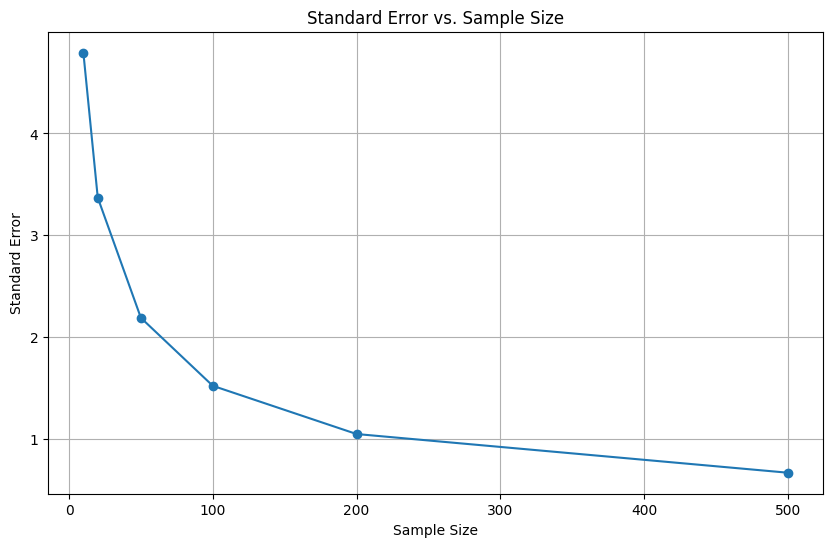

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(standard_error_series.index, standard_error_series.values, marker='o')
plt.title("Standard Error vs. Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Standard Error")
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The simulated dataset of 2000 blood pressure readings had a mean of approximately 119.78 and a standard deviation of approximately 15.18.
*   Histograms of sample means for sample sizes 10, 50, 100, and 500 visually demonstrated the Central Limit Theorem: as the sample size increased, the distribution of sample means became narrower and more bell-shaped, centering around the population mean.
*   The calculated standard error of the sample means decreased as the sample size increased, confirming the relationship described by the formula $SE = \sigma / \sqrt{n}$.

### Insights or Next Steps

*   The simulation clearly illustrates that larger sample sizes lead to a more precise estimate of the population mean due to a smaller standard error.
*   This understanding of the Central Limit Theorem and the impact of sample size is crucial for designing studies and interpreting the results of statistical analyses.
